In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

sns.set_style('whitegrid')
sns.set_context("paper")


# Data from 42

In [2]:
df = pd.read_csv("results/gnn/data_from_42_filtered_results.csv",index_col=0)
df

,Name,Smile,avg.exp.value(cal/cc)1/2,D predicted,P predicted,H predicted,PRED SOLUBILITY^2,PRED SOLUBILITY,PREDICTED SOL (cal/cc)1/2
0,"1,3- butadien",C=CC=CÃÂ ÃÂ,7.10,14.333053,3.121037,2.265931,220.31172,14.842901,7.256368
1,"1,3-BUTANEDIOL",CC(CCO)O,14.14,16.620504,8.776996,20.816790,786.61560,28.046669,13.711400
2,1-Chlorobutane,ÃÂ CCCCClÃÂ ÃÂ,8.44,16.249712,5.847187,1.837930,301.62073,17.367231,8.490458
3,1-Pentanol,CCCCCOÃÂ ÃÂ,10.60,15.710418,6.189959,13.914411,478.74362,21.880210,10.696754
4,2-Ethyl-1-hexanol,CCCCC(CC)COÃÂ ÃÂ,9.85,15.653282,3.701785,11.812841,398.27170,19.956745,9.756414
...,...,...,...,...,...,...,...,...,...
57,Succinic anhydride,C1CC(=O)OC1=OÃÂ,15.40,18.397135,18.735767,9.130342,772.84670,27.800120,13.590867
58,Tetrahydrofuran,C1CCOC1ÃÂ ÃÂ,9.10,17.287924,5.386555,7.921169,390.63223,19.764418,9.662389
59,Tetrahydronaphthalene,C1CCC2=CC=CC=C2C1ÃÂ ÃÂ,9.60,19.045706,1.911807,1.399194,368.35165,19.192490,9.382786
60,Toluene,CC1=CC=CC=C1ÃÂ ÃÂ,8.94,18.231934,1.151522,2.567746,340.32272,18.447838,9.018743


In [3]:
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

In [4]:
#42 col rename
df.rename(columns={'avg.exp.value(cal/cc)1/2':'observed', 'PREDICTED SOL (cal/cc)1/2':'predicted'},inplace=True)

In [5]:
df['diff'] = abs(df['predicted']-df['observed'])
top_diff=df.sort_values(by='diff',ascending=False)[:15]['Name'].tolist()


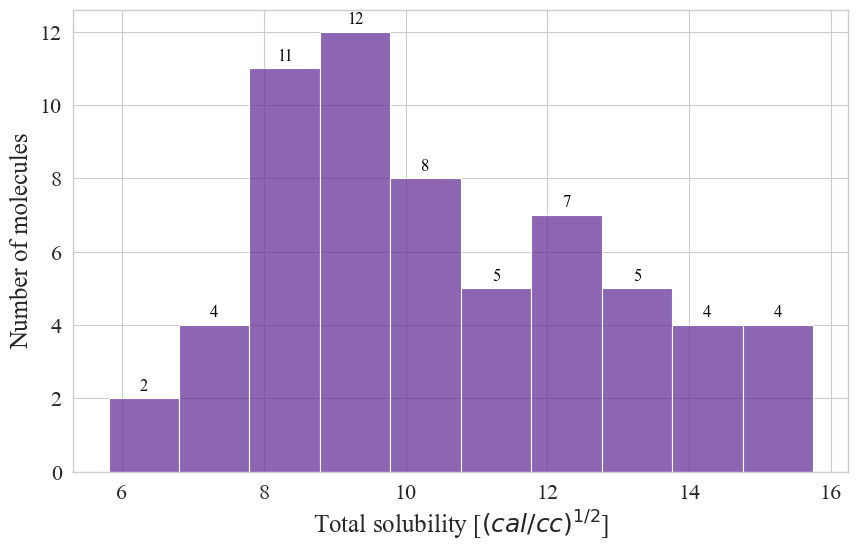

In [6]:
fig,ax = plt.subplots(figsize=(10,6))

t_hist = sns.histplot(df['observed'],bins=10,color='rebeccapurple')

# Set x-axis and y-axis label font sizes
label_fontsize = 18

ax.set_xlabel(r'Total solubility [$(cal/cc)^{1/2}$]', fontsize=label_fontsize)
ax.set_ylabel(r'Number of molecules', fontsize=label_fontsize)

# Set tick label font sizes
tick_label_fontsize = 16
ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)

for rect in t_hist.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

fig.savefig('figs/42_T_histograms.pdf',dpi=600)
fig.savefig('figs/42_T_histograms.png',dpi=600)

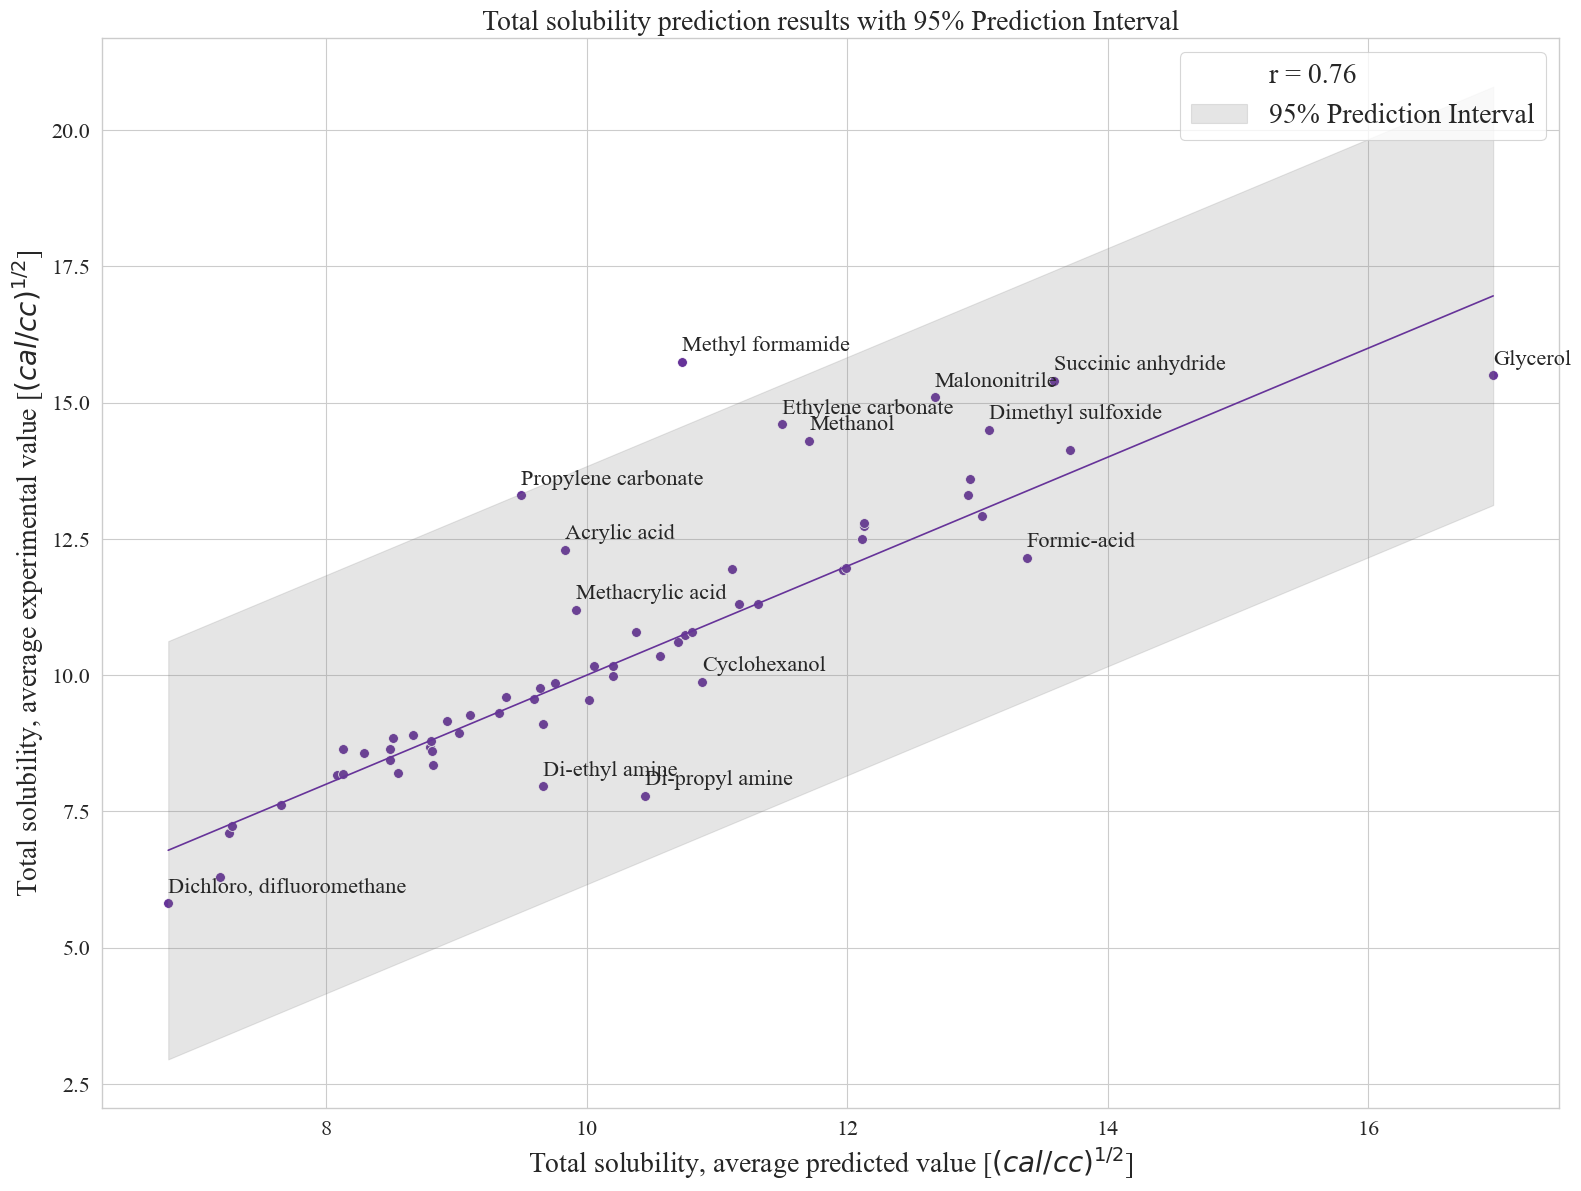

In [10]:
df = df.sort_values(by='predicted')  # Sort the DataFrame by 'predicted'

z_score = 1.96
df['lower_bound'] = df['predicted'] - z_score * df['predicted'].std()
df['upper_bound'] = df['predicted'] + z_score * df['predicted'].std()

# Create the scatter plot with prediction interval
fig,ax=plt.subplots(figsize=(16, 12))
ax=sns.scatterplot(x='predicted', y='observed', data=df,color='rebeccapurple',s=50)#rebeccapurple
for i, row in df.iterrows():
    if row['Name'] in top_diff:
        plt.annotate(row['Name'], (row['predicted'], row['observed']+0.2),fontsize=16)
        
    #if row['predicted']>row['observed']+0.8 or  row['predicted']<row['observed']-0.8:
    #    plt.annotate(row['mol'], (row['predicted'], row['observed']))
    
#sns.regplot(x='predicted', y='observed', data=df, scatter_kws={'alpha':0.5}, ci=95)
fig.set_tight_layout(True)
ax.plot([], [], ' ',color='white', label="r = 0.76")
ax=sns.lineplot(x='predicted',y='predicted',data=df, color='rebeccapurple')
ax.lines[0].set_linestyle("--")
ax.fill_between(df['predicted'], df['lower_bound'], df['upper_bound'], color='grey', alpha=0.2, label='95% Prediction Interval')
plt.title('Total solubility prediction results with 95% Prediction Interval',fontsize=20)
plt.xlabel(r'Total solubility, average predicted value [$(cal/cc)^{1/2}$]',fontsize=20)
plt.ylabel(r'Total solubility, average experimental value [$(cal/cc)^{1/2}$]',fontsize=20)
ax.tick_params(labelsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
fig.savefig('figs/42_GNN.pdf',dpi=600)




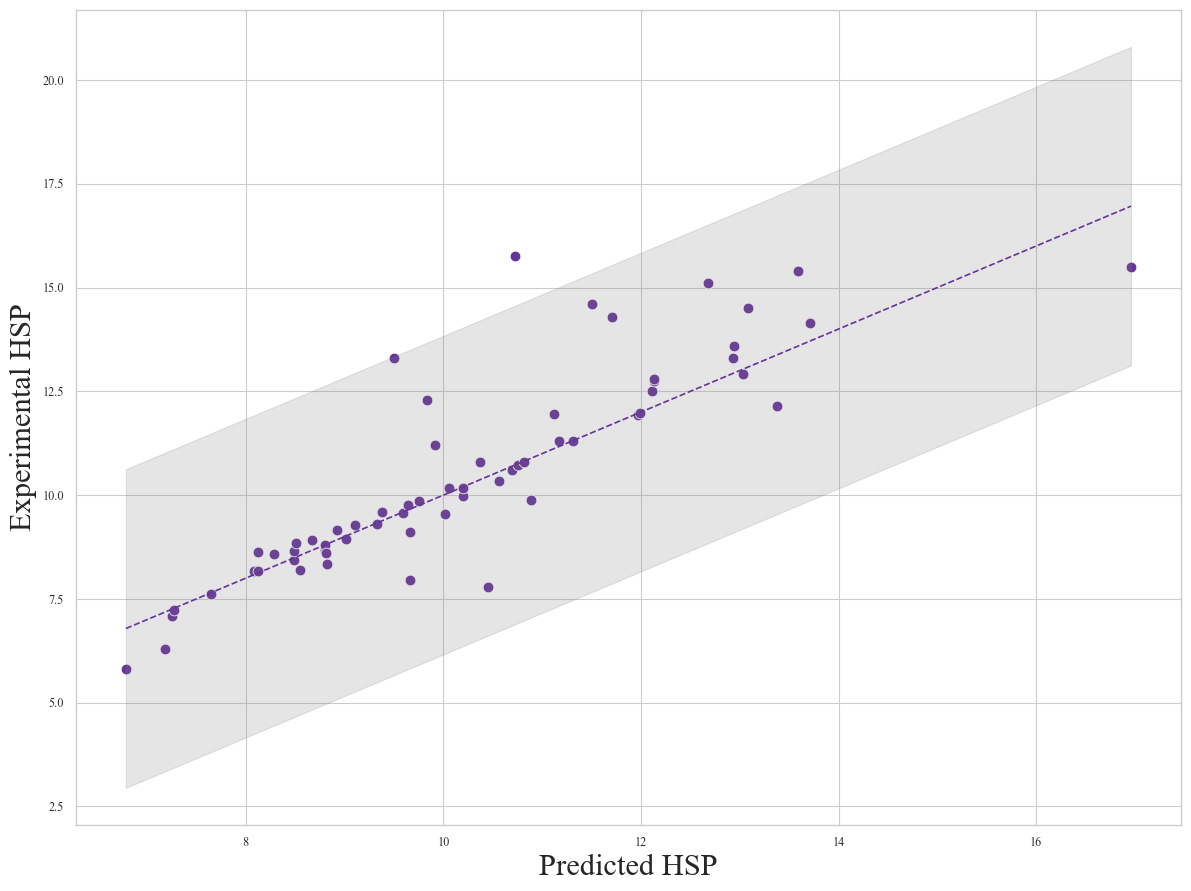

In [11]:
df = df.sort_values(by='predicted')  # Sort the DataFrame by 'predicted'

z_score = 1.96
df['lower_bound'] = df['predicted'] - z_score * df['predicted'].std()
df['upper_bound'] = df['predicted'] + z_score * df['predicted'].std()

# Create the scatter plot with prediction interval
fig,ax=plt.subplots(figsize=(12, 9))
ax=sns.scatterplot(x='predicted', y='observed', data=df,color='rebeccapurple',s=60)#rebeccapurple
#for i, row in df.iterrows():
#    if row['mol'] in top_diff:
#        plt.annotate(row['mol'], (row['predicted'], row['observed']))
        
    #if row['predicted']>row['observed']+0.8 or  row['predicted']<row['observed']-0.8:
    #    plt.annotate(row['mol'], (row['predicted'], row['observed']))
    
#sns.regplot(x='predicted', y='observed', data=df, scatter_kws={'alpha':0.5}, ci=95)
fig.set_tight_layout(True)

ax=sns.lineplot(x='predicted',y='predicted',data=df, color='rebeccapurple')
ax.lines[0].set_linestyle("--")
ax.fill_between(df['predicted'], df['lower_bound'], df['upper_bound'], color='grey', alpha=0.2, label='95% Prediction Interval')
#plt.title('Total solubility prediction results with 95% Prediction Interval',fontsize=22)
plt.xlabel(r'Predicted HSP',fontsize=22)
plt.ylabel(r'Experimental HSP',fontsize=22)
#plt.legend(fontsize=11)
plt.grid(True)
plt.show()
fig.savefig('figs/Fig.png',dpi=600)




# Data from 6
XGBOOST 10

In [12]:
df = pd.read_csv('results/xgboost/10/data_from_6_filtered_results.csv',index_col=0)


In [13]:
df.rename(columns={'D':'D observed','P':'P observed','H':'H observed','PREDICTED SOL':'pred total','total':'true total'},inplace=True)
df.head()

,Name,Smile,true total,H observed,P observed,D observed,D predicted,P predicted,H predicted,PREDICTED SOL^2,pred total
10,3-METHYLPENTANE,CCC(C)CC,14.67,0.00,0.00,14.670000,14.716492,0.631899,0.318151,217.07565,14.733487
11,"2,4-DIMETHYLHEXANE",CCC(C)CC(C)C,14.65,0.00,0.00,14.650000,15.105976,0.506469,0.261414,228.51538,15.116725
14,benzene,C1=CC=CC=C1,18.41,2.05,1.02,18.267052,18.471643,1.345032,2.910487,351.48166,18.747845
15,toluene,CC1=CC=CC=C1,18.32,2.00,1.40,18.156608,18.438234,1.257494,2.498821,347.79388,18.649233
16,STYRENE,C=CC1=CC=CC=C1,19.07,4.10,1.00,18.597175,19.131344,1.142335,2.614927,374.15110,19.342985


In [14]:
D = df[['D observed','D predicted']]
P = df[['P observed','P predicted']]
H = df[['H observed','H predicted']]
T = df[['pred total','true total']]


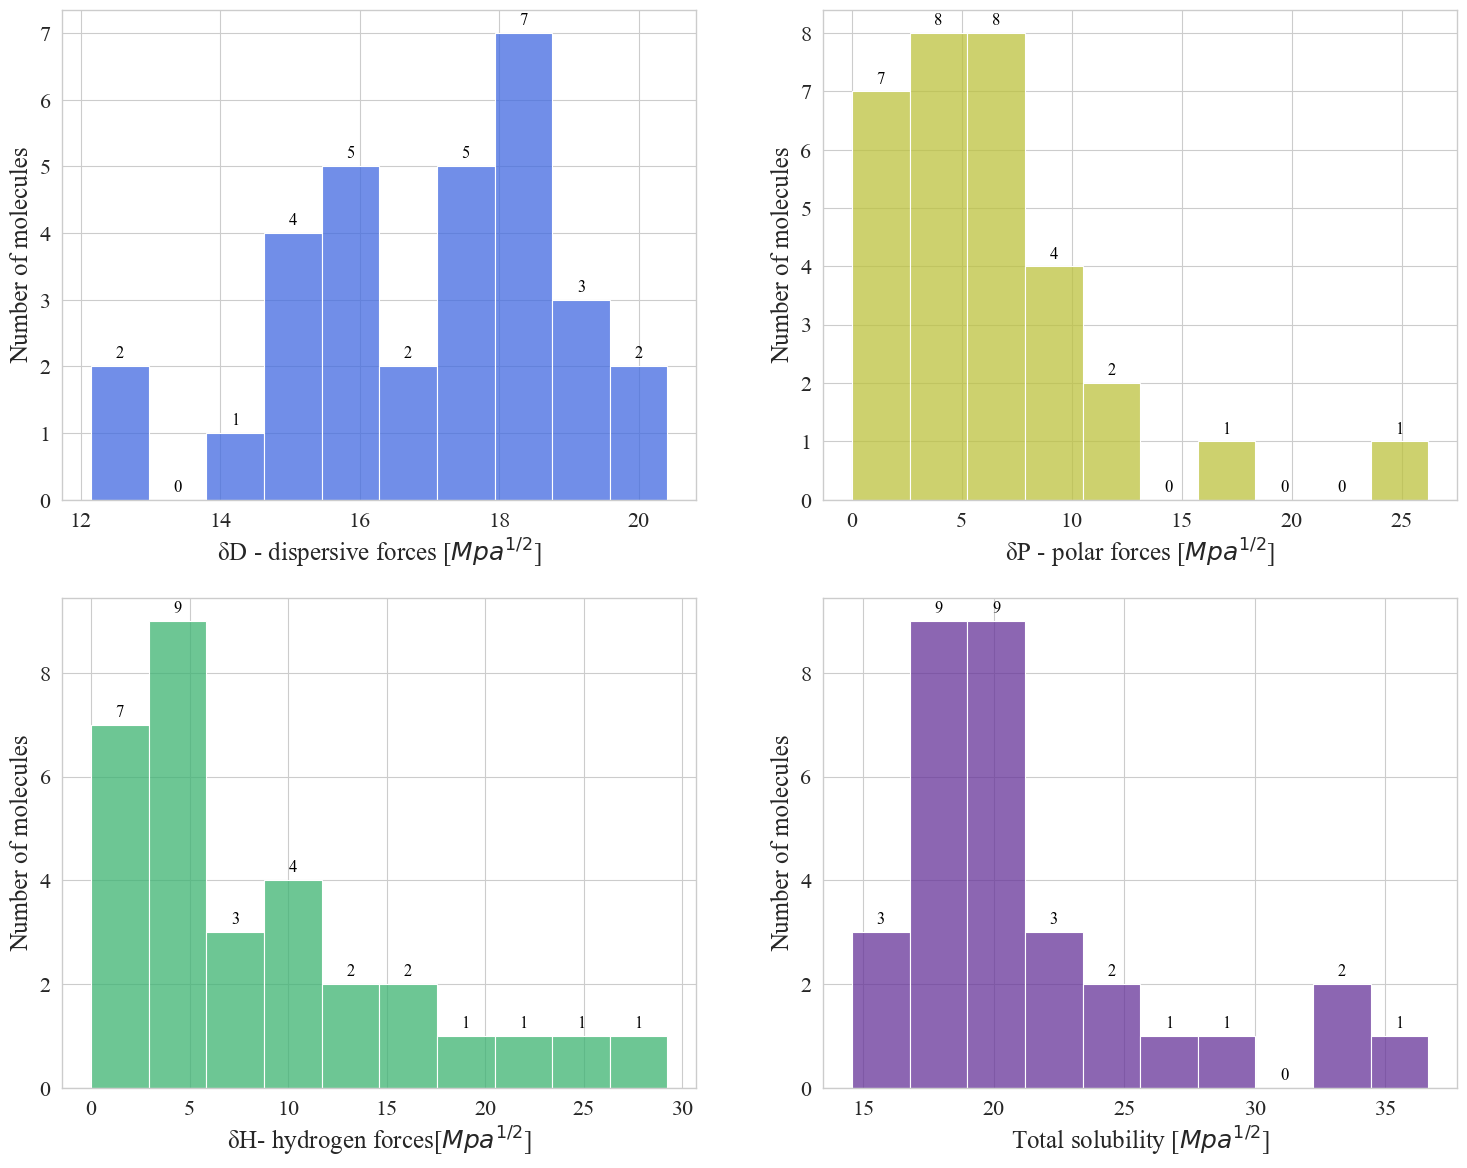

In [15]:
fig,axs = plt.subplots(2,2,figsize=(18,14))

d_hist = sns.histplot(df['D observed'],bins=10,ax=axs[0][0],color='royalblue')
p_hist = sns.histplot(df['P observed'],bins=10,ax=axs[0][1],color='#bdc23d')
h_hist = sns.histplot(df['H observed'],bins=10,ax=axs[1][0],color='mediumseagreen')
t_hist = sns.histplot(df['true total'],bins=10,ax=axs[1][1],color='rebeccapurple')

# Set x-axis and y-axis label font sizes
label_fontsize = 18
axs[0, 0].set_xlabel(r'δD - dispersive forces [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[0, 0].set_ylabel(r'Number of molecules', fontsize=label_fontsize)

axs[0, 1].set_xlabel(r'δP - polar forces [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[0, 1].set_ylabel(r'Number of molecules', fontsize=label_fontsize)

axs[1, 0].set_xlabel(r'δH- hydrogen forces[$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[1, 0].set_ylabel(r'Number of molecules', fontsize=label_fontsize)

axs[1, 1].set_xlabel(r'Total solubility [$Mpa^{1/2}$]', fontsize=label_fontsize)
axs[1, 1].set_ylabel(r'Number of molecules', fontsize=label_fontsize)

# Set tick label font sizes
tick_label_fontsize = 16
for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=tick_label_fontsize)


# Annotate each bin with its Number of molecules
for ax, hist_data in zip(axs.flatten(), [d_hist,p_hist,h_hist,t_hist]):
    for rect in hist_data.patches:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color='black')

fig.savefig('figs/6_HSPT_histograms.pdf',dpi=600)
fig.savefig('figs/6_HSPT_histograms.png',dpi=600)

In [16]:

D = D.sort_values(by='D predicted')  # Sort the DataFrame by 'predicted'
P = P.sort_values(by='P predicted')  # Sort the DataFrame by 'predicted'
H = H.sort_values(by='H predicted')  # Sort the DataFrame by 'predicted'
T = T.sort_values(by='pred total')  # Sort the DataFrame by 'predicted'


z_score = 1.96
D['lower_bound'] = D['D predicted'] - z_score * D['D predicted'].std()
D['upper_bound'] = D['D predicted'] + z_score * D['D predicted'].std()

P['lower_bound'] = P['P predicted'] - z_score * P['P predicted'].std()
P['upper_bound'] = P['P predicted'] + z_score * P['P predicted'].std()

H['lower_bound'] = H['H predicted'] - z_score * H['H predicted'].std()
H['upper_bound'] = H['H predicted'] + z_score * H['H predicted'].std()

T['lower_bound'] = T['pred total'] - z_score * T['pred total'].std()
T['upper_bound'] = T['pred total'] + z_score * T['pred total'].std()


In [17]:
df['D diff'] = abs(df['D predicted']-df['D observed'])
D_top_diff=df.sort_values(by='D diff',ascending=False)[:3]['Name'].tolist()

df['P diff'] = abs(df['P predicted']-df['P observed'])
P_top_diff=df.sort_values(by='P diff',ascending=False)[:3]['Name'].tolist()

df['H diff'] = abs(df['H predicted']-df['H observed'])
H_top_diff=df.sort_values(by='H diff',ascending=False)[:3]['Name'].tolist()

df['Total diff'] = abs(df['pred total']-df['true total'])
T_top_diff=df.sort_values(by='Total diff',ascending=False)[:3]['Name'].tolist()

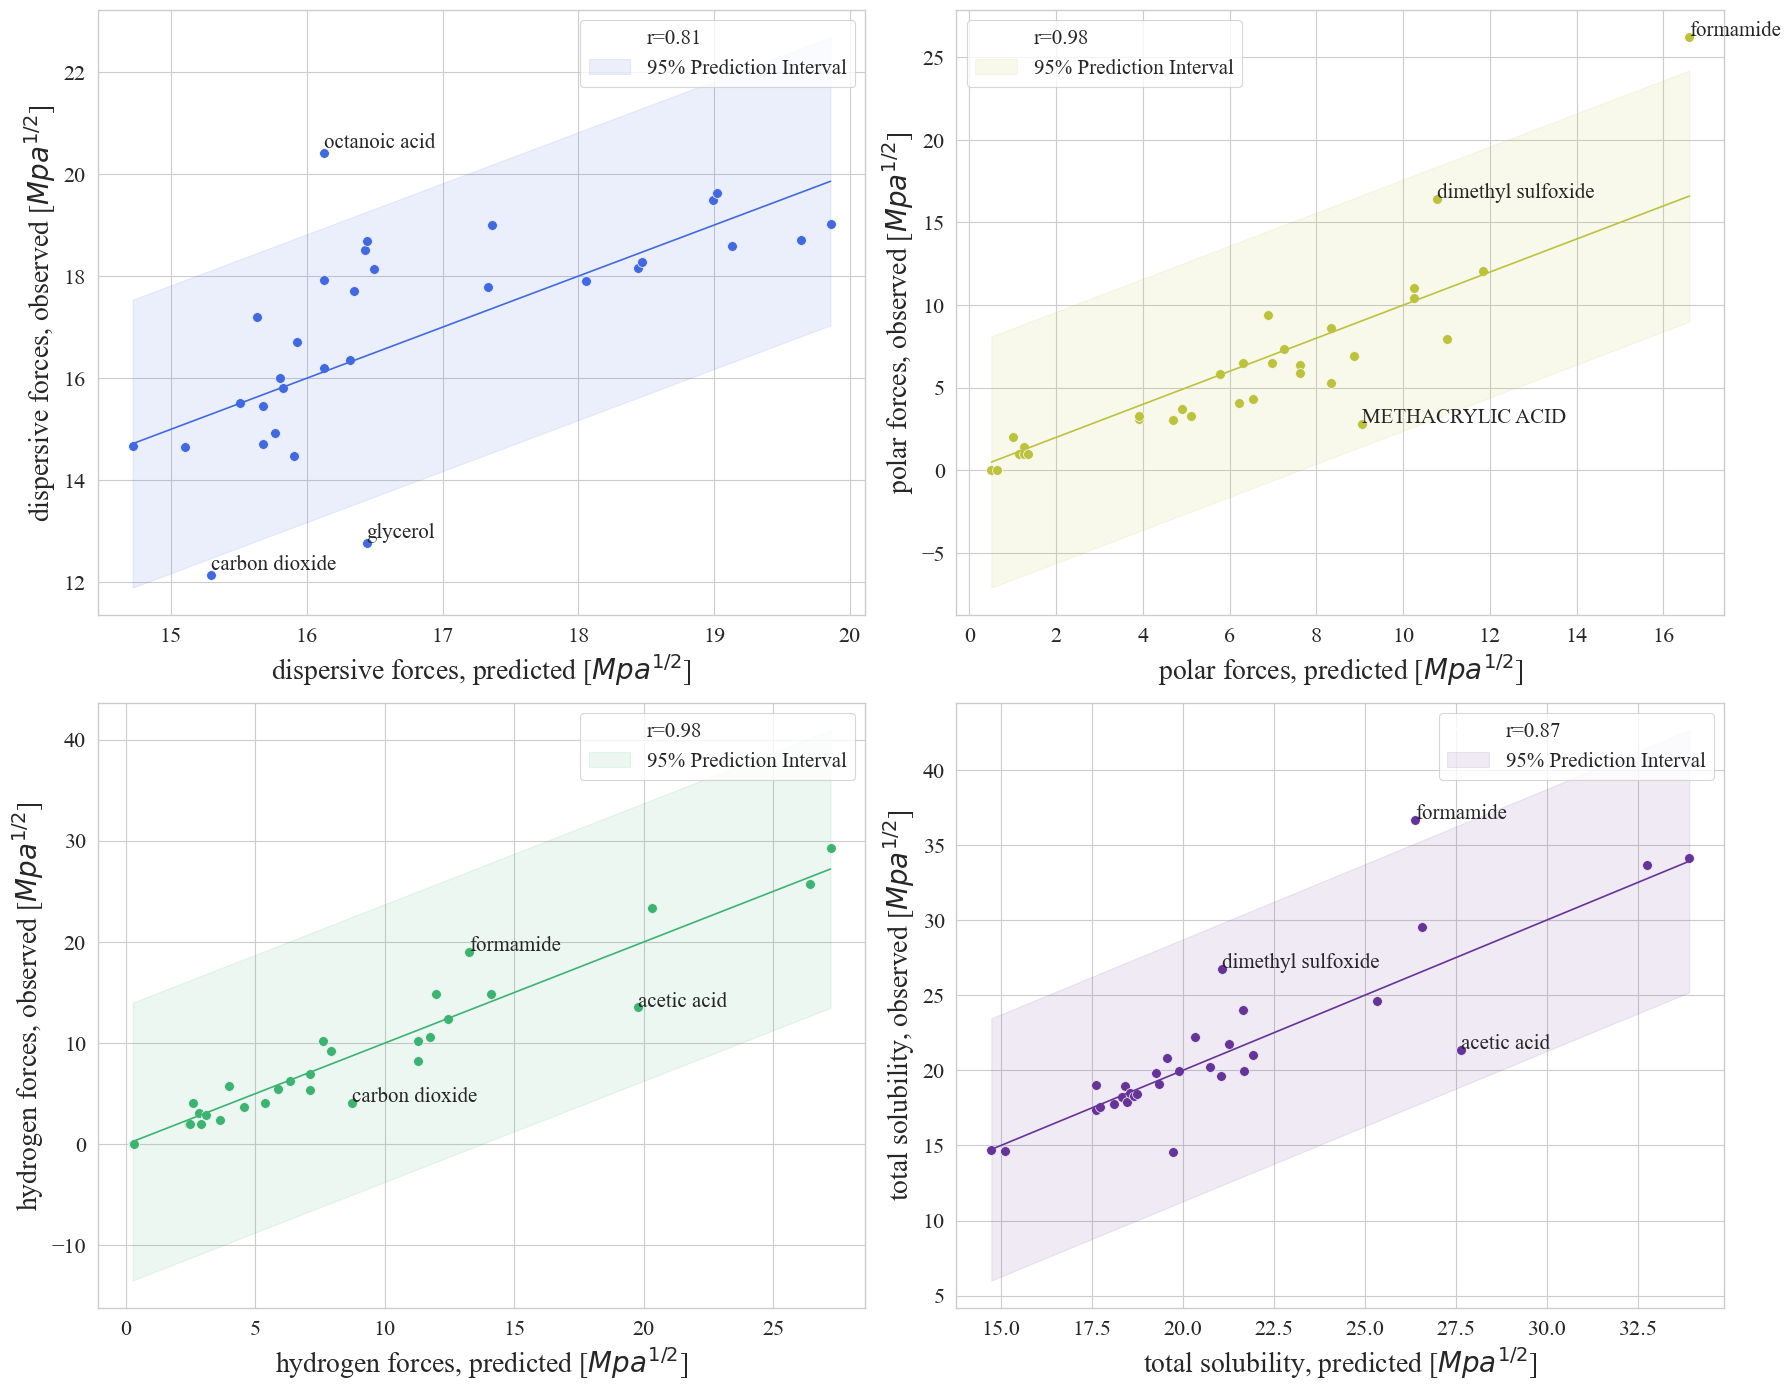

In [21]:
fig,axs = plt.subplots(2,2,figsize=(18,14))
fig.set_tight_layout(True)

axs[0,0].plot([], [], ' ',color='white', label="r=0.81")
axs[0,1].plot([], [], ' ',color='white',  label="r=0.98")
axs[1,0].plot([], [], ' ',color='white',  label="r=0.98")
axs[1,1].plot([], [], ' ',color='white',  label="r=0.87")

sns.scatterplot(x='D predicted', y='D observed', data=D,color='royalblue',ax=axs[0,0],s=50)#rebeccapurple
axs[0,0].fill_between(D['D predicted'], D['lower_bound'], D['upper_bound'], color='royalblue', alpha=0.1, label='95% Prediction Interval')
sns.lineplot(x='D predicted',y='D predicted',data=D, color='royalblue',ax=axs[0,0])
axs[0,0].lines[0].set_linestyle("--")
for i, row in df.iterrows():
    if row['Name'] in D_top_diff:
        axs[0,0].annotate(row['Name'], (row['D predicted'], row['D observed']+0.1),fontsize=15)

sns.scatterplot(x='P predicted', y='P observed', data=P,color='#bdc23d',ax=axs[0,1],s=50)#rebeccapurple
axs[0,1].fill_between(P['P predicted'], P['lower_bound'], P['upper_bound'], color='#bdc23d', alpha=0.1, label='95% Prediction Interval')
sns.lineplot(x='P predicted',y='P predicted',data=P, color='#bdc23d',ax=axs[0,1])
axs[0,1].lines[0].set_linestyle("--")
for i, row in df.iterrows():
    if row['Name'] in P_top_diff:
        axs[0,1].annotate(row['Name'], (row['P predicted'], row['P observed']+0.1),fontsize=15)

sns.scatterplot(x='H predicted', y='H observed', data=H,color='mediumseagreen',ax=axs[1,0],s=50)#rebeccapurple
axs[1,0].fill_between(H['H predicted'], H['lower_bound'], H['upper_bound'], color='mediumseagreen', alpha=0.1, label='95% Prediction Interval')
sns.lineplot(x='H predicted',y='H predicted',data=H, color='mediumseagreen',ax=axs[1,0])
axs[1,0].lines[0].set_linestyle("--")
for i, row in df.iterrows():
    if row['Name'] in H_top_diff:
        axs[1,0].annotate(row['Name'], (row['H predicted'], row['H observed']+0.1),fontsize=15)

sns.scatterplot(x='pred total', y='true total', data=T,color='rebeccapurple',ax=axs[1,1],s=50)#rebeccapurple
axs[1,1].fill_between(T['pred total'], T['lower_bound'], T['upper_bound'], color='rebeccapurple', alpha=0.1, label='95% Prediction Interval')
sns.lineplot(x='pred total',y='pred total',data=T, color='rebeccapurple',ax=axs[1,1])
axs[1,1].lines[0].set_linestyle("--")
for i, row in df.iterrows():
    if row['Name'] in T_top_diff:
        axs[1,1].annotate(row['Name'], (row['pred total'], row['true total']+0.1),fontsize=15)

axs[0,0].set_xlabel(r'dispersive forces, predicted [$Mpa^{1/2}$]',fontsize=20)
axs[0,0].set_ylabel(r'dispersive forces, observed [$Mpa^{1/2}$]',fontsize=20)

axs[0,1].set_xlabel(r'polar forces, predicted [$Mpa^{1/2}$]',fontsize=20)
axs[0,1].set_ylabel(r'polar forces, observed [$Mpa^{1/2}$]',fontsize=20)

axs[1,0].set_xlabel(r'hydrogen forces, predicted [$Mpa^{1/2}$]',fontsize=20)
axs[1,0].set_ylabel(r'hydrogen forces, observed [$Mpa^{1/2}$]',fontsize=20)

axs[1,1].set_xlabel(r'total solubility, predicted [$Mpa^{1/2}$]',fontsize=20)
axs[1,1].set_ylabel(r'total solubility, observed [$Mpa^{1/2}$]',fontsize=20)


axs[0,0].legend(fontsize=15)
axs[0,1].legend(fontsize=15)
axs[1,0].legend(fontsize=15)
axs[1,1].legend(fontsize=15)

for ax in axs.flatten():
    ax.tick_params(axis='both', which='major', labelsize=16)

''' 
ax=sns.lineplot(x='predicted',y='predicted',data=df, color='rebeccapurple')
ax.lines[0].set_linestyle("--")
ax.fill_between(df['predicted'], df['lower_bound'], df['upper_bound'], color='grey', alpha=0.2, label='95% Prediction Interval')
plt.title('Total solubility prediction results with 95% Prediction Interval, r = 0.87',fontsize=20)
plt.xlabel(r'Total solubility, average predicted value [$(cal/cc)^{1/2}$]',fontsize=20)
plt.ylabel(r'Total solubility, average experimental value [$(cal/cc)^{1/2}$]',fontsize=20)
plt.legend()
'''
fig.savefig('figs/6_GNN.pdf',dpi=600)
fig.savefig('figs/6_GNN.png',dpi=600)